## ADITYA PANDITRAO


## 22MCB0032


## SOCIAL NETWORK ANALYSIS




***Community Detection Techniques on Social Network***

In [116]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from heapq import heappush, heappop
from itertools import count
from networkx.algorithms.community.centrality import girvan_newman

In [117]:
def edge_betweenness_centrality(G,normalized=True):
  # Set betweenness of all vertices and edges as zero
  betweenness = dict.fromkeys(G, 0.0) 
  betweenness.update(dict.fromkeys(G.edges(), 0.0))

  nodes = G
  for node in nodes:
      S, parent, sigma = single_source_dijkstra(G, node)
      betweenness = get_betweenness(betweenness, S, parent, sigma, node)
  # remove nodes and keep edges
  for n in G:  
      del betweenness[n]
  betweenness = rescale_edges(betweenness, len(G), normalized=normalized, directed=G.is_directed())
  return betweenness

def single_source_dijkstra(G, node):
  
  S = []
  parent = {}
  for v in G:
      parent[v] = []
  sigma = dict.fromkeys(G, 0.0) 
  distance = {}
  sigma[node] = 1.0
  seen = {node: 0}
  c = count()
  Q = []
  heappush(Q, (0, next(c), node, node))
  while Q:
      (dist, _, pred, u) = heappop(Q)
      if u in distance:
          continue 
      sigma[u] += sigma[pred]
      S.append(u)
      distance[u] = dist
      for v, edgedata in G[u].items():
          uv_dist = dist + edgedata.get(None, 1)
          if v not in distance and (v not in seen or uv_dist < seen[v]):
              seen[v] = uv_dist
              heappush(Q, (uv_dist, next(c), u, v))
              sigma[v] = 0.0
              parent[v] = [u]
          elif uv_dist == seen[v]: 
              sigma[v] += sigma[u]
              parent[v].append(u)
  return S, parent, sigma


def get_betweenness(betweenness, S, parent, sigma, s):
  delta = dict.fromkeys(S, 0)
  while S:
      v = S.pop()
      coeff = (1 + delta[v]) / sigma[v]
      for u in parent[v]:
          c = sigma[u] * coeff
          if (u, v) not in betweenness:
              betweenness[(v, u)] += c
          else:
              betweenness[(u, v)] += c
          delta[u] += c
      if v != s:
          betweenness[v] += delta[v]
  return betweenness

def rescale_edges(betweenness, n, normalized, directed=False, k=None):
    if normalized:
        if n <= 1:
            scale = None
        else:
            scale = 1 / (n * (n - 1))
    else:  
        # divide by 2 for undirected graphs
        if not directed:
            scale = 0.5
        else:
            scale = None
    if scale is not None:
        if k is not None:
            scale = scale * n / k
        for u in betweenness:
            betweenness[u] *= scale
    return betweenness

In [118]:
def edge_to_remove(graph):
  ebc_per_edge = edge_betweenness_centrality(graph)
  edge = ()
  for key, value in sorted(ebc_per_edge.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break
  return edge

def girvan_newman(graph, num_communities):
  cc_node_set = nx.connected_components(graph)
  cc_count = nx.number_connected_components(graph)
  removed_edges = []

  while(cc_count < num_communities):
    edge = edge_to_remove(graph)
    removed_edges.append(edge)
    graph.remove_edge(edge[0], edge[1])
    cc_node_set = nx.connected_components(graph)
    cc_count = nx.number_connected_components(graph)
  return cc_node_set, removed_edges

def get_remaining_edges(graph, removed_edges):
  for edge in removed_edges:
    if edge in graph.edges:
      graph.remove_edge(edge[0], edge[1])
  return graph

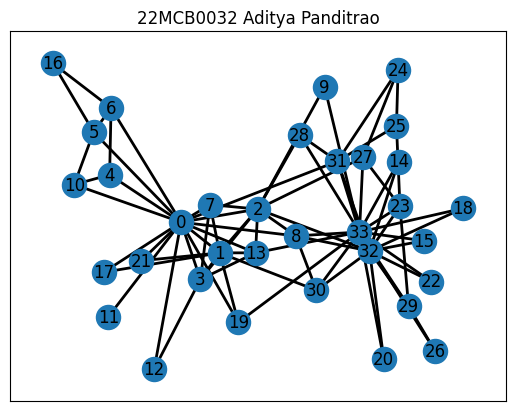

In [119]:
# Original Zachary's Karate Club graph
G = nx.karate_club_graph()
pos = nx.spring_layout(G, k=0.1, iterations=30, scale=1.3)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos, width=2,alpha=1,edge_color='k')
plt.title("22MCB0032 Aditya Panditrao")
plt.show()

## Girvan Newman Algorithim

In [120]:
def visualize_community_structure(num_communities, G):
  communities, removed_edges = girvan_newman(G,num_communities)
  G = get_remaining_edges(G, removed_edges)
  node_groups = []

  colors = ['yellow', 'green','blue','red','cyan']

  for i in communities:
    node_groups.append(list(i))

  color_map = []
  for node in G: 
    for i in range(len(node_groups)):
      if node in node_groups[i]:
        color_map.append(colors[i])  

  pos = nx.spring_layout(G, k=0.1, iterations=15, scale=10)
  nx.draw_networkx_nodes(G, pos=pos, node_color=color_map)
  nx.draw_networkx_labels(G, pos=pos)
  nx.draw_networkx_edges(G, pos=pos, edgelist=removed_edges, width=0.25, edge_color='k', style='dashed')
  nx.draw_networkx_edges(G, pos=pos, width=1,alpha=1,edge_color='k')
  plt.title("22MCB0032 Aditya Panditrao")
  plt.show()

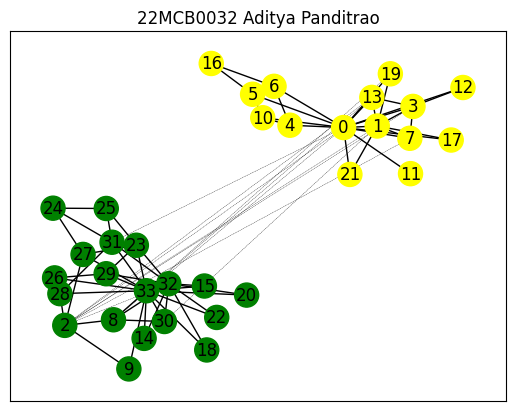

In [121]:
# Zachary's Karate Club graph with 2 communities
visualize_community_structure(num_communities=2, G = nx.karate_club_graph())

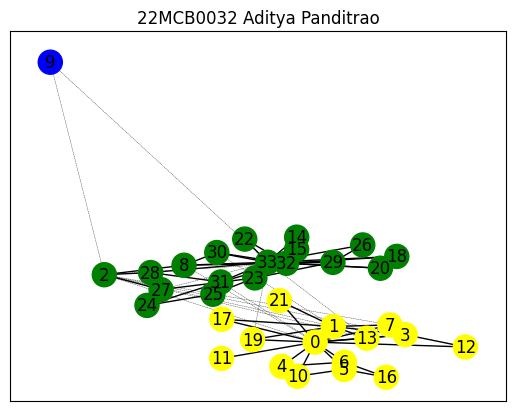

In [126]:
# Zachary's Karate Club graph with 3 communities
visualize_community_structure(num_communities=3, G = nx.karate_club_graph())

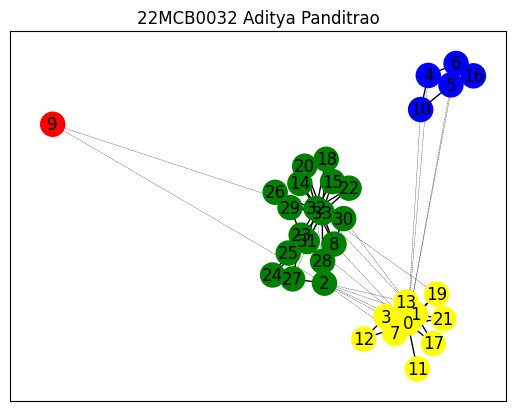

In [127]:
# Zachary's Karate Club graph with 4 communities
visualize_community_structure(num_communities=4, G = nx.karate_club_graph())

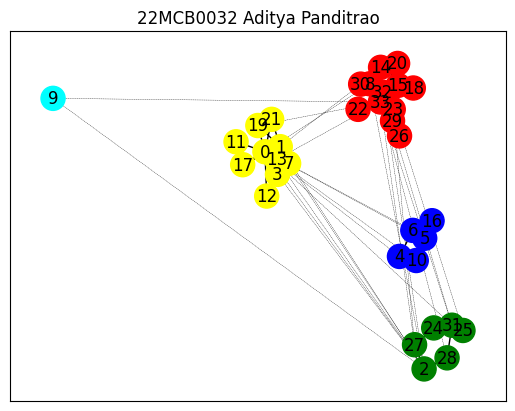

<Figure size 640x480 with 0 Axes>

In [131]:
# Zachary's Karate Club graph with 5 communities
visualize_community_structure(num_communities=5, G = nx.karate_club_graph())
plt.savefig("22mcb0032_girvan_newman.png")

### Planted L-Partition

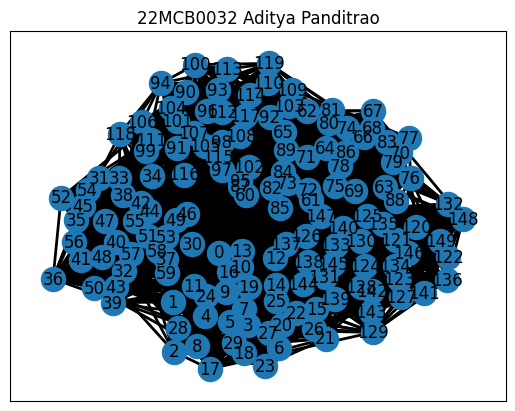

In [21]:
# Original Planted L-Partition Graph
G = nx.planted_partition_graph(5,30,0.8,0.1)
pos = nx.spring_layout(G, k=0.1, iterations=30, scale=1.3)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos, width=2,alpha=1,edge_color='k')
plt.title("22MCB0032 Aditya Panditrao")
plt.show()

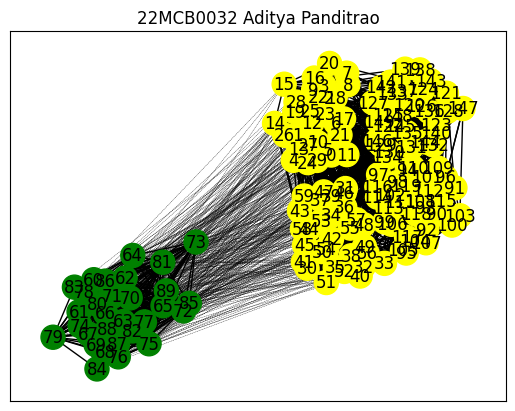

In [22]:
# Planted L-Partition Graph graph with 2 communities
visualize_community_structure(num_communities=2, G = nx.planted_partition_graph(5,30,0.8,0.1))

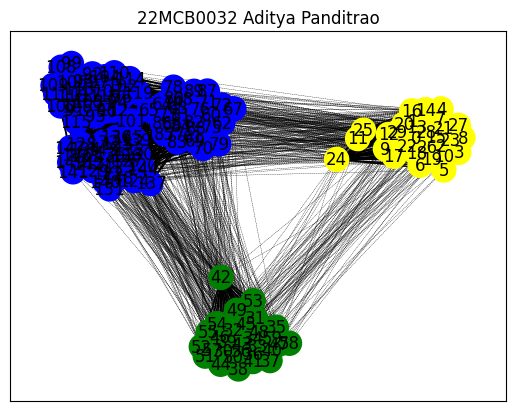

In [23]:
# Planted L-Partition Graph graph with 3 communities
visualize_community_structure(num_communities=3, G = nx.planted_partition_graph(5,30,0.8,0.1))

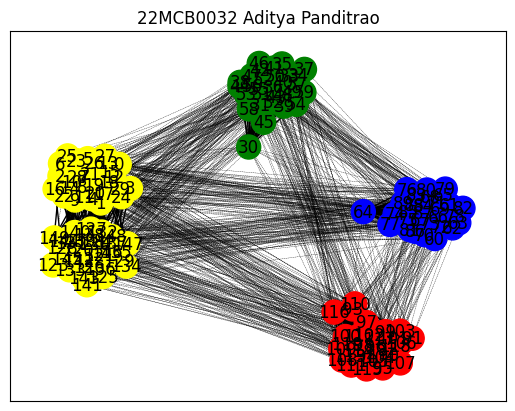

In [24]:
# Planted L-Partition Graph graph with 4 communities
visualize_community_structure(num_communities=4, G = nx.planted_partition_graph(5,30,0.8,0.1))

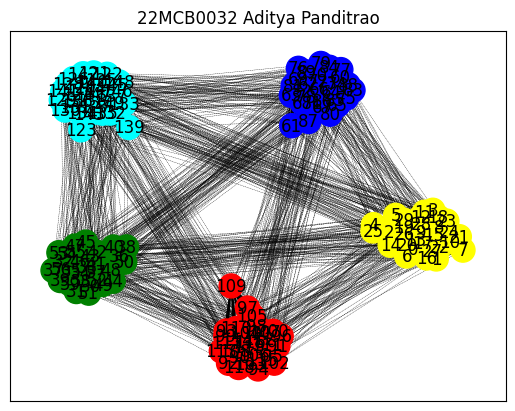

In [25]:
# Planted L-Partition Graph graph with 5 communities
visualize_community_structure(num_communities=5, G = nx.planted_partition_graph(5,30,0.8,0.1))

## SPECTRAL CLUSTERING

In [40]:
import numpy as np
import scipy.sparse as sp
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [41]:
def normalize_eigenvectors(e):
    return e/np.sqrt(np.sum(e**2))

In [42]:
def laplacian(G, laplacian_type="unnormalized"):

    D = np.diag(np.sum(np.array(nx.adjacency_matrix(G).todense()), axis=1))
    W = nx.adjacency_matrix(G).toarray()

    assert D.shape == W.shape, "Shapes of D and W don't match."

    L = None

    if laplacian_type == "unnormalized":
        L = D - W
    elif laplacian_type == "symmetric":
        I = np.ones(D.shape)
        D_inv_root = np.linalg.inv(np.sqrt(D))

        L = I - np.dot(D_inv_root, W).dot(D_inv_root)
    elif laplacian_type == "random_walk":
        I = np.ones(D.shape)
        D_inv = np.linalg.matrix_power(D, -1)

        L = I - np.matmul(D_inv, W)
    else:
        raise ValueError("Laplacian type can be 'normalized' or 'unnormalized'.")

    return L

In [43]:
def generate_labels_dict(G, kmeans):
    num_nodes = len(G.nodes)
    num_clusters = kmeans.n_clusters

    labels_dict = {c: [] for c in range(num_clusters)}
    
    for i in range(num_nodes):
        labels_dict[kmeans.labels_[i]].append(i)

    return labels_dict

In [44]:
def visualize_graph(G, pos, labels_dict=None, colors=None, node_size=100, edge_alpha=0.1, labels=False):
    if labels_dict is not None and colors is not None:
        for k, v in labels_dict.items():
            # nodes
            nx.draw_networkx_nodes(G, 
                pos,
                nodelist=v,
                node_color=colors[k],
                node_size=node_size
            )
    else:
        nx.draw_networkx_nodes(G, pos, node_size=node_size) 
        
    if labels:
        nx.draw_networkx_labels(G, pos)

    nx.draw_networkx_edges(G, pos, width=1.0, alpha=edge_alpha)

In [45]:
def spectral_clustering(G, k, pos, colors, visualize=True, laplacian_type="unnormalized", **kwargs):
    # Calculate Laplacian
    L = laplacian(G, laplacian_type=laplacian_type)

    # Get eigenvectors from the Laplacian
    _, eig_vectors = sp.linalg.eigs(L, k)
    
    # Use eigenvectors as features
    U = eig_vectors.real
    
    if laplacian_type == "symmetric":
        U = np.apply_along_axis(normalize_eigenvectors, 0, U)

    # Cluster using KMeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(U)

    # Get labels
    labels_dict = generate_labels_dict(G, kmeans)

    # Visualize
    if visualize:
        node_size = kwargs.get('node_size', 100)
        edge_alpha = kwargs.get('edge_alpha', 0.1)
        labels = kwargs.get('labels', False)
        
        visualize_graph(G, pos, labels_dict, COLORS, node_size=node_size, edge_alpha=edge_alpha, labels=labels)

    return labels_dict

In [46]:
COLORS = \
    ["tab:blue", "tab:orange", "tab:green", 
     "tab:red", "tab:purple", "tab:brown", 
     "tab:pink", "tab:gray", "tab:olive", 
     "tab:cyan"]

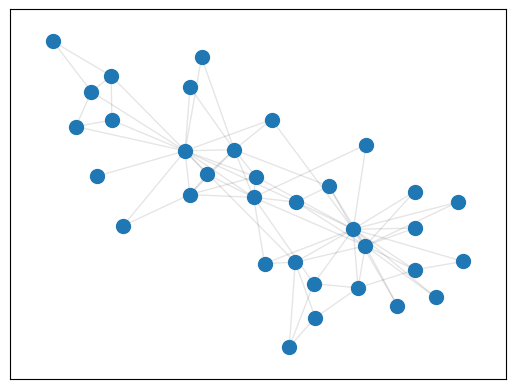

In [47]:
G_kk = nx.karate_club_graph()
pos_kk = nx.spring_layout(G_kk)

visualize_graph(G_kk, pos_kk)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


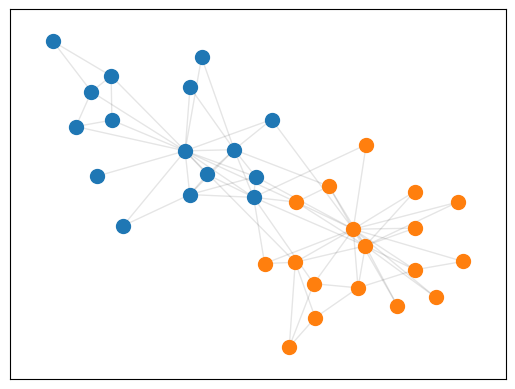

In [48]:
labels_dict = spectral_clustering(G_kk, 2, pos_kk, COLORS, laplacian_type="symmetric")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


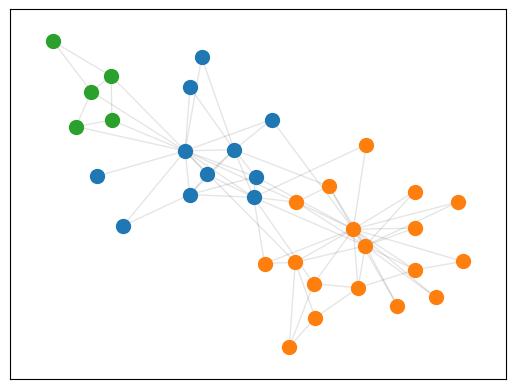

In [49]:
labels_dict = spectral_clustering(G_kk, 3, pos_kk, COLORS, laplacian_type="symmetric")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


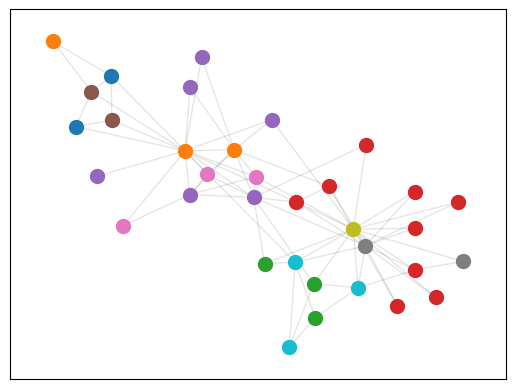

In [50]:
labels_dict = spectral_clustering(G_kk, 10, pos_kk, COLORS, laplacian_type="symmetric")

### Testing on Planted L-Partition Model

In [52]:
K = 5
NODES_PER_BUCKET = 200
P_IN = 0.8
P_OUT = 0.1

Text(0.5, 1.0, '22MCB0032 Aditya Panditrao')

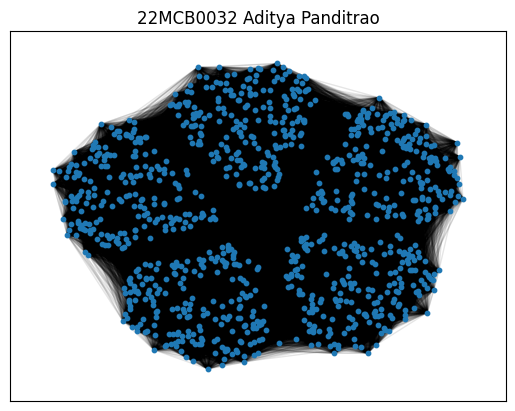

In [54]:
G_pl = nx.generators.community.planted_partition_graph(K, NODES_PER_BUCKET, P_IN, P_OUT)
pos_pl = nx.spring_layout(G_pl)

visualize_graph(G_pl, pos_pl, edge_alpha=0.1, node_size=10, labels=False)
plt.title("22MCB0032 Aditya Panditrao")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


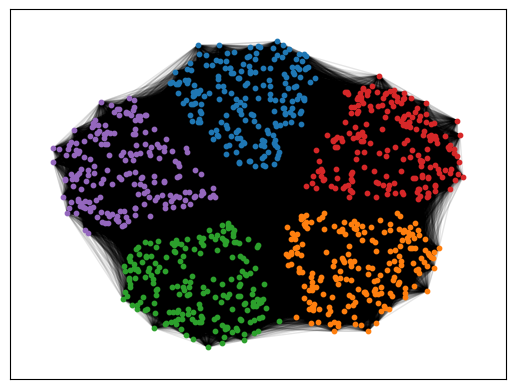

In [55]:
labels_dict = spectral_clustering(G_pl, 
                                  K, 
                                  pos_pl, 
                                  COLORS, 
                                  laplacian_type="symmetric", 
                                  edge_alpha=0.1, 
                                  node_size=10, 
                                  labels=False)

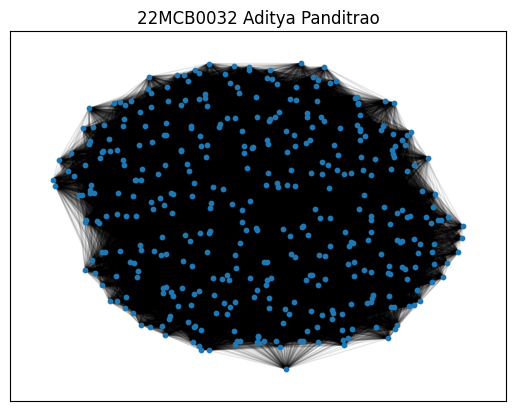

In [129]:
K = 2
NODES_PER_BUCKET = 200
P_IN = 0.6
P_OUT = 0.3

G_ = nx.generators.community.planted_partition_graph(K, NODES_PER_BUCKET, P_IN, P_OUT)
pos_ = nx.spring_layout(G_)

visualize_graph(G_, pos_, edge_alpha=0.1, node_size=10, labels=False)
plt.title("22MCB0032 Aditya Panditrao")
plt.savefig("22mcb0032_spectral.png")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


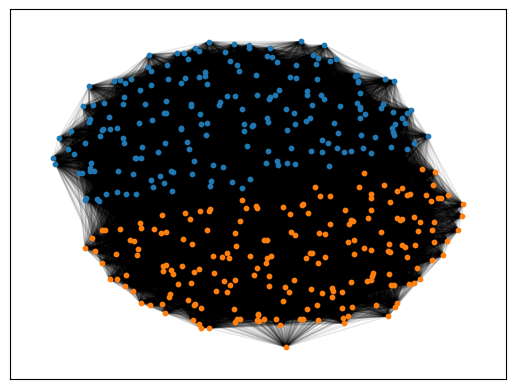

In [130]:
labels_dict = spectral_clustering(G_, 
                                  K, 
                                  pos_, 
                                  COLORS, 
                                  laplacian_type="symmetric", 
                                  edge_alpha=0.1, 
                                  node_size=10, 
                                  labels=False)
plt.savefig("22mcb0032_spectral_clustering.png")

## LOUVIAN'S ALGORITHIM

In [94]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.6 MB/s eta 0:00:00


In [95]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import pandas as pd
import numpy as np
import math

# graph related library
import networkx as nx
import leidenalg
import igraph as ig
import community as community_louvain
import networkx.algorithms.community as nx_comm

In [96]:
!wget "https://snap.stanford.edu/data/bigdata/communities/com-dblp.ungraph.txt.gz"

--2023-05-29 16:17:05--  https://snap.stanford.edu/data/bigdata/communities/com-dblp.ungraph.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4138463 (3.9M) [application/x-gzip]
Saving to: ‘com-dblp.ungraph.txt.gz’

com-dblp.ungraph.tx 100%[===================>]   3.95M  1.82MB/s    in 2.2s    

2023-05-29 16:17:08 (1.82 MB/s) - ‘com-dblp.ungraph.txt.gz’ saved [4138463/4138463]



In [98]:
!gunzip  "/content/com-dblp.ungraph.txt.gz"  "/content/sample_data"

gzip: /content/sample_data is a directory -- ignored


In [99]:
DBLP = pd.read_csv('com-dblp.ungraph.txt', 
                   sep='\t', header=None, skiprows = 4, 
                   names=['node1', 'node2'])

In [100]:
# create graph from edge list
DBLP_network = nx.Graph(DBLP.values.tolist())

In [101]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Average Cluster Coefficients:", nx.average_clustering(graph))
    print("Connected components:", len(list(nx.connected_components(graph))))

In [102]:
get_graph_info(DBLP_network)

Number of nodes: 317080
Number of edges: 1049866
Average Cluster Coefficients: 0.6324308280637396
Connected components: 1


In [103]:
import community.community_louvain as cl
louvain_communities = cl.best_partition(DBLP_network, random_state=0)

In [104]:
def convert_communities_dict_to_list(communities_dict):
    unique_partition_count = len(list(set(communities_dict.values())))
    print("Number of unique communities:", unique_partition_count)
    communities = [[] for i in range(unique_partition_count)]
    for node in communities_dict.keys():
        communities[communities_dict[node]].append(node)
    return communities

In [105]:
louvain_communities = convert_communities_dict_to_list(louvain_communities)

Number of unique communities: 198


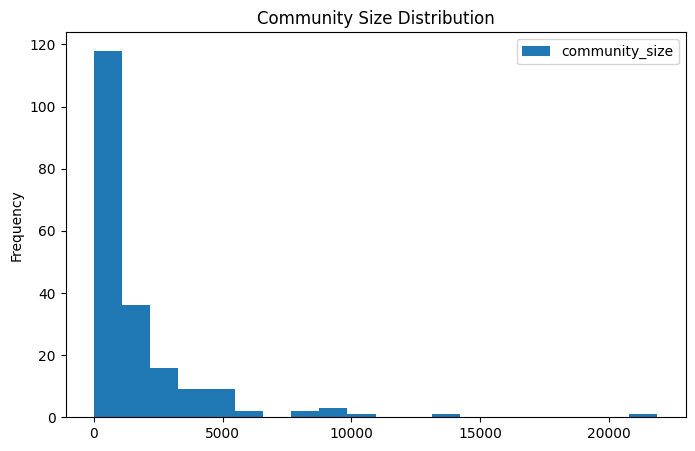

In [106]:
community_sizes = pd.DataFrame([len(community) for community in louvain_communities], 
                               columns=["community_size"])
community_sizes.plot.hist(bins=20, figsize=(8,5), title="Community Size Distribution");

In [107]:
# take a look at the modularity of the Louvain algorithm output
print("Modularity:", 
      round(nx_comm.modularity(DBLP_network, louvain_communities), 6))

Modularity: 0.821751


In [108]:
# function to check whether the determined communities are connected
def check_community_disconnection(graph, communities):
    total_connected = 0
    disconnected_community_indexes = []
    for i in range(len(communities)):
        if nx.is_connected(graph.subgraph(communities[i])):
            total_connected += 1
        else:
            disconnected_community_indexes.append(i)
    print("Total Communities:", len(communities))
    print("Total Communities Connected:", total_connected)
    print("Disconnected Community Indexes:", disconnected_community_indexes)

In [109]:
check_community_disconnection(DBLP_network, louvain_communities)

Total Communities: 198
Total Communities Connected: 193
Disconnected Community Indexes: [5, 8, 18, 111, 131]


In [110]:
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD"][:number_of_colors]
    node_colors = []
    
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

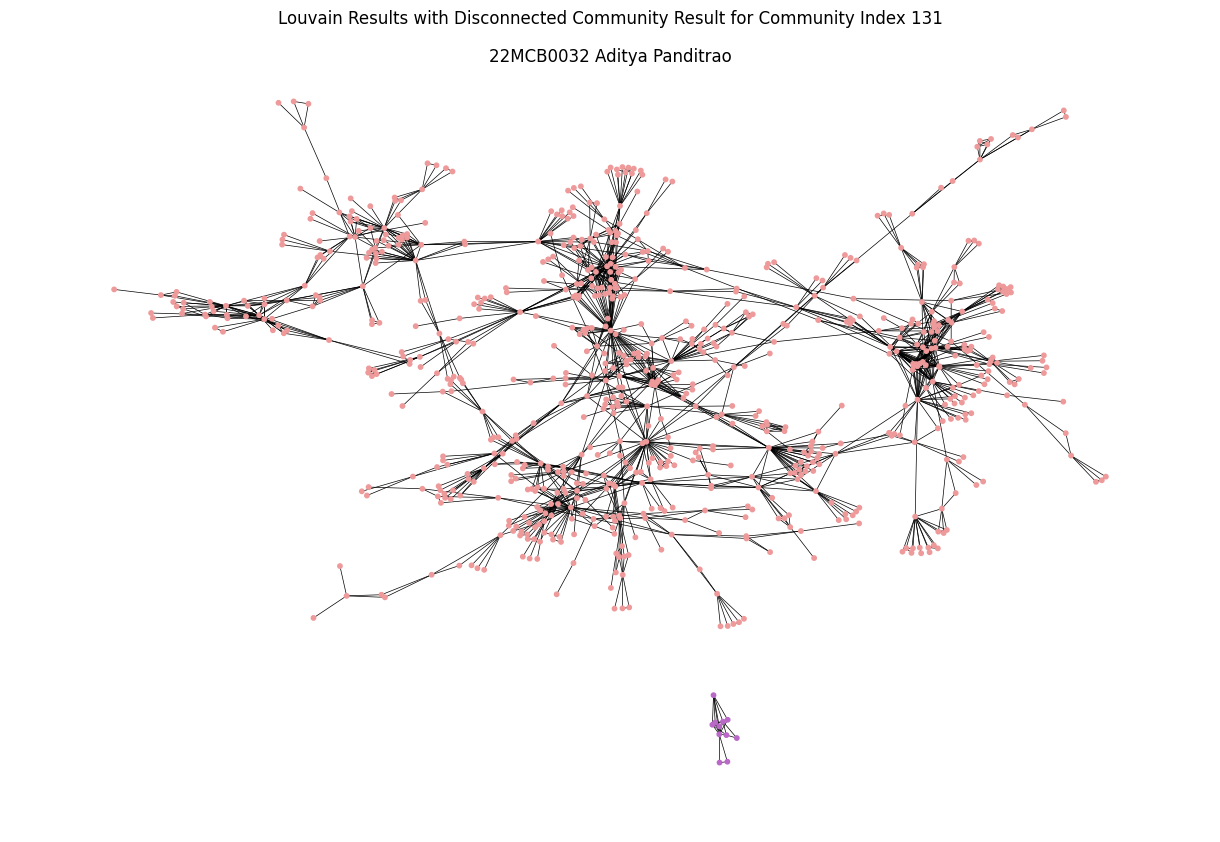

In [115]:
# get subgraph of community with index 131 for demo
disconnected_subgraph = DBLP_network.subgraph(louvain_communities[131])
disconnected_components = list(nx.connected_components(disconnected_subgraph))

# create visualization
node_colors = create_community_node_colors(disconnected_subgraph, disconnected_components)
pos = nx.spring_layout(disconnected_subgraph, iterations=50, k=0.05,
                       seed=2)

plt.figure(1,figsize=(12,8)) 
nx.draw(disconnected_subgraph,
        pos = pos,
        node_size=10,
        width=0.5,
        node_color=node_colors)
plt.title("Louvain Results with Disconnected Community Result for Community Index 131")
plt.suptitle("22MCB0032 Aditya Panditrao")
plt.savefig("22mcb0032_louvain.png") 